In [ ]:
import kagglehub


path = kagglehub.dataset_download("kalikrishnaprasanna/tutordataset")

print("Path to dataset files:", path)

100%|██████████| 1.24G/1.24G [00:11<00:00, 120MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1


In [2]:
import os
print(os.listdir("/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/"))


['1.complete', 'versions']


In [3]:
import os
for root, dirs, files in os.walk("/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/"):
    print(root)


/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word/We
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word/Where
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word/Know
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word/Learn
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word/Like
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Word/Stop
/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordatase

In [5]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is inc

In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


DATA_DIR = '/root/.cache/kagglehub/datasets/kalikrishnaprasanna/tutordataset/versions/1/tutor/Alphabets'


mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils


labels_map = {label: idx for idx, label in enumerate(sorted(os.listdir(DATA_DIR)))}

data = []
labels = []


for label in labels_map.keys():
    label_dir = os.path.join(DATA_DIR, label)
    for image_file in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_file)
        image = cv2.imread(image_path)
        if image is None:
            continue
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            landmark_list = []
            for lm in hand_landmarks.landmark:
                landmark_list.extend([lm.x, lm.y, lm.z])
            data.append(landmark_list)
            labels.append(labels_map[label])



In [ ]:

X = np.array(data)
y = to_categorical(np.array(labels), num_classes=len(labels_map))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(labels_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3501 - loss: 2.1888 - val_accuracy: 0.9153 - val_loss: 0.4123
Epoch 2/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8275 - loss: 0.5510 - val_accuracy: 0.9577 - val_loss: 0.2373
Epoch 3/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8890 - loss: 0.3602 - val_accuracy: 0.9448 - val_loss: 0.1919
Epoch 4/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9153 - loss: 0.2892 - val_accuracy: 0.9673 - val_loss: 0.1402
Epoch 5/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9291 - loss: 0.2418 - val_accuracy: 0.9724 - val_loss: 0.1183
Epoch 6/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9349 - loss: 0.2178 - val_accuracy: 0.9729 - val_loss: 0.1087
Epoch 7/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9437 - loss: 0.1976 - val_accuracy: 0.9662 - val_loss: 0.1089
Epoch 8/20
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9427 - loss: 0.1922 - 

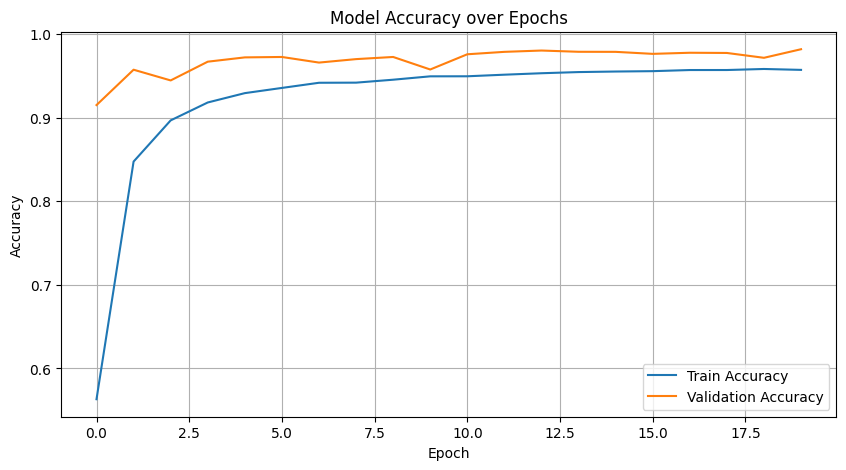

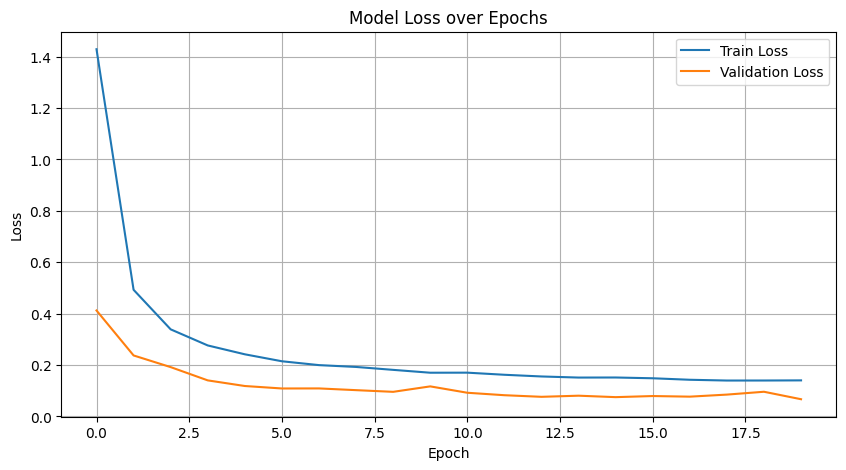

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0620
Test Accuracy: 98.22%


In [8]:
model.save('asl_alphabet_model.h5')
np.save('label_map.npy', labels_map)
